In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
df = pd.read_csv('ecommerce_40000.csv')
df

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,ProductName,Quantity,PricePerUnit,Discount,PaymentMethod,CustomerLocation,DeliveryTimeDays,DeliveryStatus,SellerID,Rating,TotalPrice
0,100001,4174,2024-05-28,370,Beauty,Item E,2,237.43,0.00,UPI,Central,14,Delivered,282,1.4,474.8600
1,100002,4507,2024-11-21,169,Home & Kitchen,Item A,3,415.81,0.05,Credit Card,Central,10,Returned,235,2.0,1185.0585
2,100003,1860,2022-09-29,284,Toys,Item E,7,475.22,0.22,UPI,North,8,Delivered,260,4.7,2594.7012
3,100004,2294,2024-04-15,327,Toys,Item C,8,226.44,0.26,Credit Card,West,9,Returned,212,5.0,1340.5248
4,100005,2130,2023-01-03,168,Books,Item D,7,209.88,0.10,Net Banking,West,4,Delivered,267,4.3,1322.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,139996,3372,2022-10-26,314,Books,Item E,8,292.74,0.07,Cash on Delivery,South,9,Delivered,276,1.1,2177.9856
39996,139997,1150,2024-11-06,477,Electronics,Item D,6,459.44,0.24,UPI,South,13,Pending,237,2.4,2095.0464
39997,139998,4617,2024-10-27,498,Beauty,Item C,5,440.12,0.05,Debit Card,South,5,Returned,274,3.1,2090.5700
39998,139999,2659,2024-08-12,159,Toys,Item C,1,19.89,0.09,Credit Card,West,9,Cancelled,285,1.9,18.0999


In [38]:
df.dtypes

OrderID               int64
CustomerID            int64
OrderDate            object
ProductID             int64
ProductCategory      object
ProductName          object
Quantity              int64
PricePerUnit        float64
Discount            float64
PaymentMethod        object
CustomerLocation     object
DeliveryTimeDays      int64
DeliveryStatus       object
SellerID              int64
Rating              float64
TotalPrice          float64
dtype: object

In [39]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [40]:
df['Months'] = df['OrderDate'].dt.to_period('M')

In [41]:
sales_trend = df.groupby('Months')['TotalPrice'].sum().round(2).reset_index()

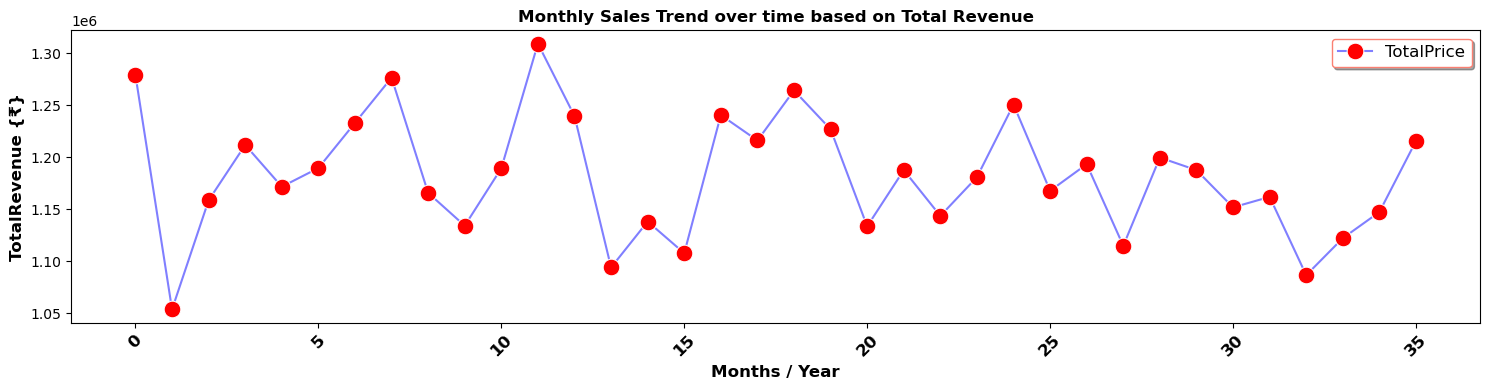

In [47]:
plt.figure(figsize = (15, 4))
sns.lineplot(data = sales_trend,
             marker = 'o',
             palette = 'cool',
             linewidth = 1.5,
             markerfacecolor = 'red',
             markersize = 12)
plt.legend(fontsize = 12, shadow =True, edgecolor = 'Salmon')
plt.xlabel('Months / Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('TotalRevenue {₹}', fontsize = 12, fontweight = 'bold')
plt.title('Monthly Sales Trend over time based on Total Revenue', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45, fontweight = 'bold', fontsize = 12)
plt.tight_layout()

In [48]:
top_category = df.groupby('ProductCategory')['TotalPrice'].sum().sort_values(ascending = False).head(10).round(2)
top_category

ProductCategory
Books             7243185.94
Electronics       7130742.32
Clothing          7111567.46
Toys              7077066.27
Beauty            6997796.85
Home & Kitchen    6992919.89
Name: TotalPrice, dtype: float64

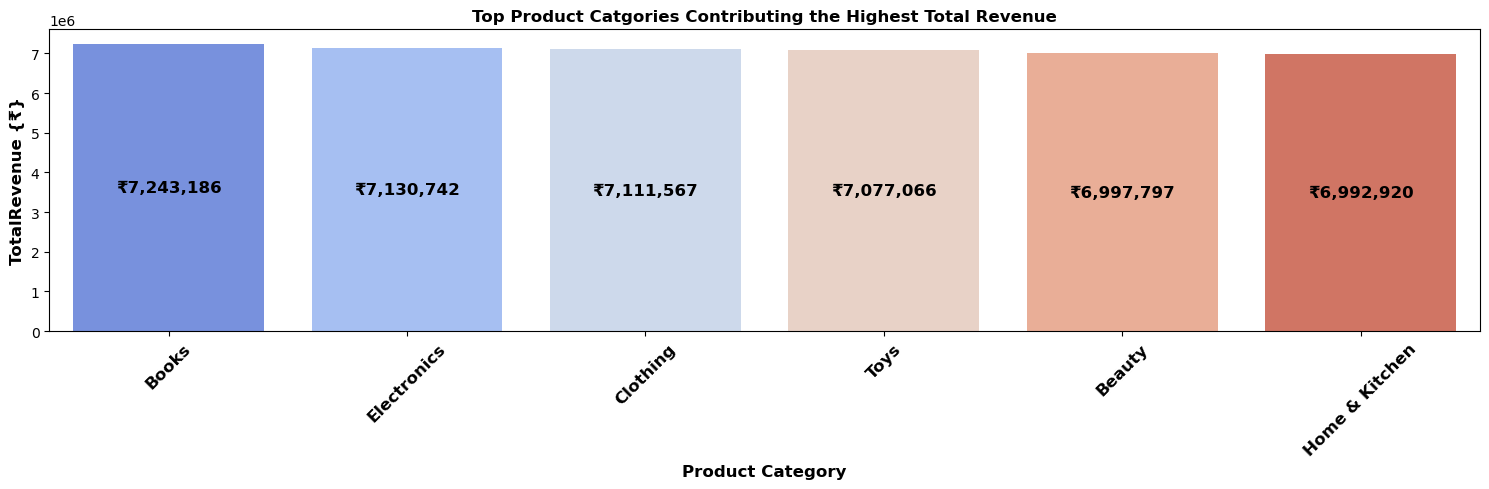

In [49]:
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = top_category.index, 
            y = top_category.values,
            palette = 'coolwarm')
for i, v in enumerate(top_category.values):
    ax.text(i, 
            v/2, 
           f'₹{v:,.0f}',
           ha = 'center',
           va = 'center', color = 'black',
           fontsize = 12, fontweight = 'bold')    
plt.xlabel('Product Category', fontsize = 12, fontweight = 'bold')
plt.ylabel('TotalRevenue {₹}', fontsize = 12, fontweight = 'bold')
plt.title('Top Product Catgories Contributing the Highest Total Revenue', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45, fontweight = 'bold', fontsize = 12)
plt.tight_layout()
plt.show()